Anggota Kelompok:
* Marbella (2540119223)
* Raphael Alexander Lesmana (2540128114)
* Albert Gabriel Tuwan (2502001353)


# Explanation

## Sapindaceae

<p align="justify">
&emsp;&emsp;The Sapindaceae family is one of the world's most varied and ecologically significant flowering plant families. This family includes roughly 140 genus and over 1,800 species found in a variety of environments ranging from tropical rainforests to subtropical areas and deserts. Species from Sapindaceae have some unique characteristics that set them apart from other families. They contain compound leaves and intricate flowers, which are frequently followed by fascinating fruits. Mangosteen, rambutan, longan, and ambarella are some well-known members of this family, which are not only recognized for their delicious fruits but also have significant economic and ecological worth.</p>






## Chloroplast

<p align="justify">
&emsp;&emsp;
Chloroplast is plant cell organelle that play a role in photosynthesis, the process by which plants convert solar energy into chemical energy stored in organic molecules. Chloroplast DNA (cpDNA) is a unique genetic material found only in plants. Chloroplast analysis entails comparing and analyzing the DNA sequences of chloroplasts from different Sapindaceae species. We can detect patterns of evolution, phylogenetic relationships, and the history of divergence within this plant family utilizing bioinformatics and molecular approaches.
</p>
<p align="justify">
&emsp;&emsp;
Methods for analyzing chloroplasts have been useful in studying plant evolution and taxonomy. In the case of Sapindaceae, chloroplast analysis was used to better understand the evolutionary relationships among the family's genera and species. The information about genetic variation in cpDNA allows us to construct a phylogenetic tree that depicts the evolutionary history of Sapindaceae and reveals patterns of genetic changes from their ancestors to the present. Furthermore, chloroplast analysis can provide insights into the adaptation of Sapindaceae plants to their environment. In the cpDNA molecule, we can observe genetic changes associated with plant adaptations to different environmental conditions, such as climate, soil, and lifestyle.
</p>

## DNA and Amino Acid

<p align="justify">
&emsp;&emsp;
Deoxyribonucleic Acid (DNA) is a long, double-stranded biomolecule that is made of four nitrogen bases (nucleotide), i.e., adenine (A), Thymine (T), Cytosine (C), and Guanine (G), and sugar-phosphate as the backbone. DNA is responsible for carrying genetic information coded in the sequence of its nucleotide. To synthesize proteins, nucleotide sequence in DNA is first transcripted into mRNA by substituting Thymine with Uracil (U), the mRNA is then translated into amino acid sequence, specifically the triplet of nucleotide, called codon, is translated into one amino acid. Then, the amino acids bonds together by peptides bond to create either polypeptides and/or protein.
</p>


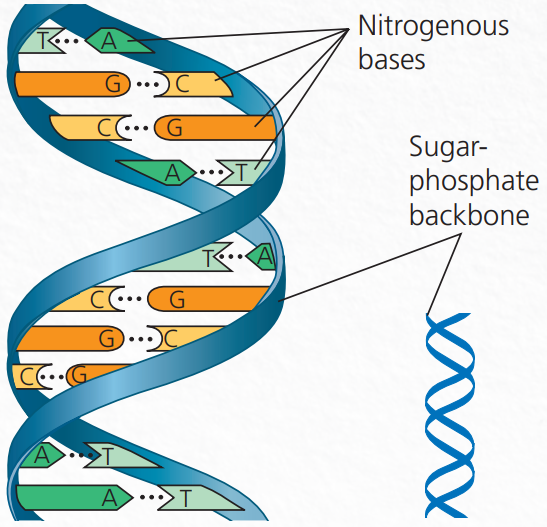

# Instalasi library `biopython`

In [ ]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 44.3 MB/s eta 0:00:00


# Import library

In [ ]:
import os

# Counting Nucleotides from the DNA Sequence
from collections import Counter

# Dataset and Exploratory Data Analysis (EDA)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading and manipulating sequence data
from Bio import Seq
from Bio import SeqIO
from Bio.SeqUtils import nt_search

In [ ]:
# Connecting google colab to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create a function to transform the record into a dictionary contain

def transform(rec, freq, classify=None):
  seq = rec.seq #Change the datatype to sequence

  # Translating nucleotide sequence to amino acid sequence
  ppt = str(seq.translate()).lower()

  # Checking the presence of the requested protein
  # 0 indicates the absence of protein, while 1 indicates the presence of protein
  protein_presence = {}
  for i in freq.keys():
    protein_presence[i] = max(0, min(1, len([j.qualifiers for j in rec.features  if j.type == "CDS" and j.qualifiers["product"][0] == i])))
  out = {"len": len(seq)} | Counter(seq) | Counter(ppt) | protein_presence

  # Checking if given input classify or not, if yes than it's training data
  if classify is not None:
    out = out | {"Sapindaceae": classify}
  return out

In [ ]:
# Creating a function to drop column with all of its value is null and
# filling any remaining missing values with 0.

def post_transform(df):
  return df.drop(columns=[c for i, c in enumerate(df.count(axis=0).index) if df.count(axis=0)[i] == 0]).fillna(0)

In [ ]:
# Set path to for training data in google drive

ns_path = "/content/drive/MyDrive/nucleotides/Non-Sapindaceae"
s_path = "/content/drive/MyDrive/nucleotides/Sapindaceae"

In [ ]:
# Read all record of sapindaceae sequence dna for trainning data
s_proteins_list = []

for i, f in enumerate(os.listdir(path=s_path)):
  s = SeqIO.read(f"/content/drive/MyDrive/nucleotides/Sapindaceae/{f}", "gb")
  for j in s.features:
    if j.type != "CDS":
      continue
    s_proteins_list.append(j.qualifiers["product"][0])

In [ ]:
s_protein_count = {p: c for p, c in sorted(Counter(s_proteins_list).items(), key=lambda x:x[1], reverse=True)}

## Experimentation

In [ ]:
columns = ["len", "T", "A", "C", "G"] # DNA base pairs
columns.extend([chr(i) for i in range(ord("a"), ord("z") + 1)]) # Amino acids
columns.extend(list(s_protein_count.keys())[:5])
columns.extend(["*", "Sapindaceae"]) # Stop codon and target
df_train = pd.DataFrame(columns=columns,
                       index=np.arange(0, 32))

# Read non-sapindaceae training data
for i, f in enumerate(os.listdir(path=ns_path)):
  ns = SeqIO.read(f"/content/drive/MyDrive/nucleotides/Non-Sapindaceae/{f}", "gb")
  df_train.loc[i] = transform(ns, s_protein_count, False)

# Read sapindaceae training data
K
for i, f in enumerate(os.listdir(path=s_path)):
  s = SeqIO.read(f"/content/drive/MyDrive/nucleotides/Sapindaceae/{f}", "gb")
  df_train.loc[i + 16] = transform(s, s_protein_count, True)

df_train = post_transform(df_train)
columns = np.array(df_train.columns)

/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(
/usr

In [ ]:
# Import library for ensamble learning

from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier

In [ ]:
# Train model using random forest
train_x = np.array(df_train.drop(columns=["Sapindaceae"]))
train_y = np.array(df_train[["Sapindaceae"]])

rf_model = RandomForestClassifier()
rf_model.fit(train_x,train_y.ravel())

RandomForestClassifier()

In [ ]:
# Train model using Histogram gradient boost
hgb_model = HistGradientBoostingClassifier()
hgb_model.fit(train_x,train_y.ravel())

HistGradientBoostingClassifier()

In [ ]:
# Train model using histogram Adaboost
ab_model = AdaBoostClassifier()
ab_model.fit(train_x,train_y.ravel())

AdaBoostClassifier()

In [ ]:
# Set path to for validation data in google drive

ns_test_path = "/content/drive/MyDrive/validation/Non-Sapindaceae"
s_test_path = "/content/drive/MyDrive/validation/Sapindaceae"

In [ ]:
df_test = pd.DataFrame(columns=columns)

# Read non-sapindaceae validation data
for i, f in enumerate(os.listdir(path=ns_test_path)):
  ns = SeqIO.read(f"/content/drive/MyDrive/validation/Non-Sapindaceae/{f}", "gb")
  df_test.loc[i] = transform(ns, s_protein_count, False)

# Read sapindaceae validation data
for i, f in enumerate(os.listdir(path=s_test_path)):
  s = SeqIO.read(f"/content/drive/MyDrive/validation/Sapindaceae/{f}", "gb")
  df_test.loc[i + 16] = transform(s, s_protein_count, True)

df_test = post_transform(df_test)

/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(
/usr

In [ ]:
test_x = np.array(df_test.drop(columns=["Sapindaceae"]))
test_y = np.array(df_test[["Sapindaceae"]])

In [ ]:
from sklearn.metrics import classification_report

## Hasil Random Forest

In [ ]:
predict_y = rf_model.predict(test_x)
print(report := classification_report(predict_y, test_y))

              precision    recall  f1-score   support

       False       0.38      1.00      0.55         3
        True       1.00      0.67      0.80        15

    accuracy                           0.72        18
   macro avg       0.69      0.83      0.67        18
weighted avg       0.90      0.72      0.76        18



## Hasil Histogram Gradient Boost

In [ ]:
predict_y = hgb_model.predict(test_x)
print(report := classification_report(predict_y, test_y))

              precision    recall  f1-score   support

       False       1.00      0.44      0.62        18
        True       0.00      0.00      0.00         0

    accuracy                           0.44        18
   macro avg       0.50      0.22      0.31        18
weighted avg       1.00      0.44      0.62        18



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hasil AdaBoost


In [ ]:
predict_y = ab_model.predict(test_x)
print(report := classification_report(predict_y, test_y))

              precision    recall  f1-score   support

       False       0.38      0.75      0.50         4
        True       0.90      0.64      0.75        14

    accuracy                           0.67        18
   macro avg       0.64      0.70      0.62        18
weighted avg       0.78      0.67      0.69        18



## Conclusion

<p align="justify">
&emsp;&emsp;
Based on the classification algorithm used above, random forest is the most reliable algorithm as it has the highest F1-score compared to other algorithms. However, when comparing the F1-scores of the 'True' and 'False' classes, the F1-score of the True class is higher than the F1-score of the False class. This occurrence indicates that the designed model performs better in classifying Sapindaceae than non-Sapindaceae. One possible reason for these results could be the lack of training data available. It is known that the dataset only contains 16 instances of Sapindaceae and 16 instances of non-Sapindaceae. This limited amount of data may result in the precision of the True class being at its maximum, 100%, as it can correctly identify Sapindaceae. However, the recall value is relatively low at 67% because only 67% of the predicted Sapindaceae instances are actually Sapindaceae in the entire dataset.
</p>

<p align="justify">
&emsp;&emsp;
To improve the performance of the model using the algorithm, it is suggested to increase the number of non-Sapindaceae data, especially those belonging to the same order but different families, as additional training data. This is supported by the fact that even plants with extreme characteristics, such as spruce trees, can be accurately predicted because they originate from different divisions, not just classes or orders.
</p>